<div style="text-align: center; font-size: 25px;">
    <span>
        <strong>[010412204101] - Khai thác dữ liệu</strong>
    </span><br>
    <span>
        <strong>Nguyễn Quốc Huy - 22H1120071 - CN22CLCC</strong>
    </span><br>
    <p>
        <strong>Bài tập 3.3</strong>
    </p>
</div>

Độ chính xác của các classifier trên dataset Digits:
QuadraticDiscriminantAnalysis: 0.9847
SVC: 0.9805
MLPClassifier: 0.9791
KNeighborsClassifier: 0.9736
GaussianProcessClassifier: 0.9096
RandomForestClassifier: 0.8178
GaussianNB: 0.7691
AdaBoostClassifier: 0.7524
DecisionTreeClassifier: 0.6871
SVC: 0.1196


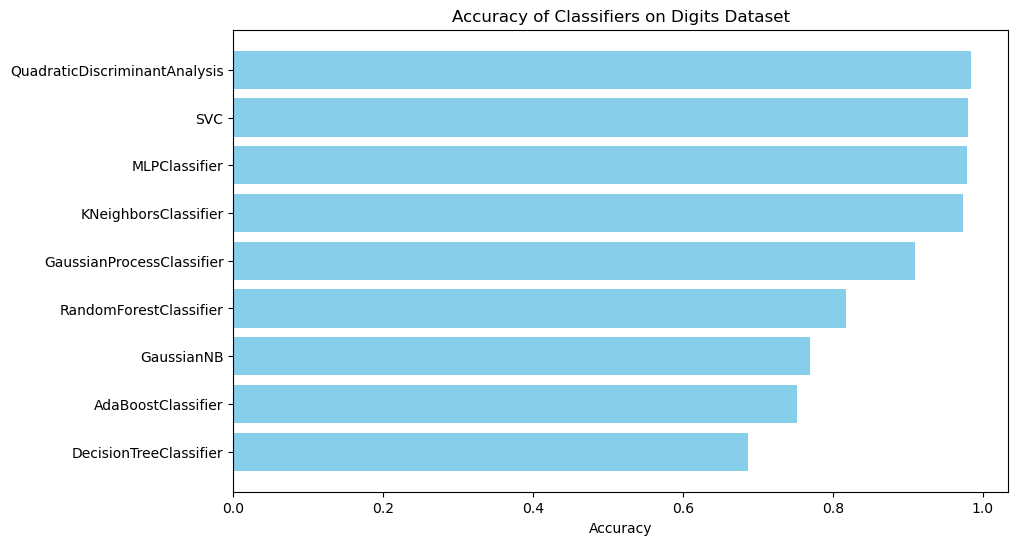

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Các classifier từ bài tập 03.1
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(reg_param=0.1)  # Tăng tham số reg_param để xử lý cảnh báo
]

# Tải dataset Digits
digits = load_digits()
X, y = digits.data, digits.target

# Chia dữ liệu thành training và test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Giảm chiều dữ liệu với PCA (nếu cần)
pca = PCA(n_components=20)  # Giảm số chiều dữ liệu xuống còn 20
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Biến lưu trữ độ chính xác của mỗi classifier
accuracy_scores = []

# Áp dụng các classifier và tính toán độ chính xác
for clf in classifiers:
    # Tạo pipeline với StandardScaler và classifier
    clf_pipeline = make_pipeline(StandardScaler(), clf)
    
    # Áp dụng PCA trước khi huấn luyện (nếu cần)
    if clf.__class__.__name__ == 'QuadraticDiscriminantAnalysis':
        clf_pipeline.fit(X_train_pca, y_train)  # Dùng X_train_pca cho QDA
    else:
        clf_pipeline.fit(X_train, y_train)  # Dùng X_train cho các classifier khác
    
    # Dự đoán trên test set
    if clf.__class__.__name__ == 'QuadraticDiscriminantAnalysis':
        y_pred = clf_pipeline.predict(X_test_pca)  # Dự đoán với X_test_pca cho QDA
    else:
        y_pred = clf_pipeline.predict(X_test)  # Dự đoán với X_test cho các classifier khác
    
    # Tính toán độ chính xác
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append((clf.__class__.__name__, accuracy))

# Sắp xếp theo độ chính xác từ cao xuống thấp
accuracy_scores = sorted(accuracy_scores, key=lambda x: x[1], reverse=True)

# Hiển thị kết quả
print("Độ chính xác của các classifier trên dataset Digits:")
for name, accuracy in accuracy_scores:
    print(f"{name}: {accuracy:.4f}")

# Vẽ biểu đồ độ chính xác của các classifier
names = [name for name, _ in accuracy_scores]
scores = [accuracy for _, accuracy in accuracy_scores]

plt.figure(figsize=(10, 6))
plt.barh(names, scores, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Classifiers on Digits Dataset')
plt.gca().invert_yaxis()  # Đảo ngược trục y để hiển thị classifier có độ chính xác cao nhất ở trên
plt.show()
